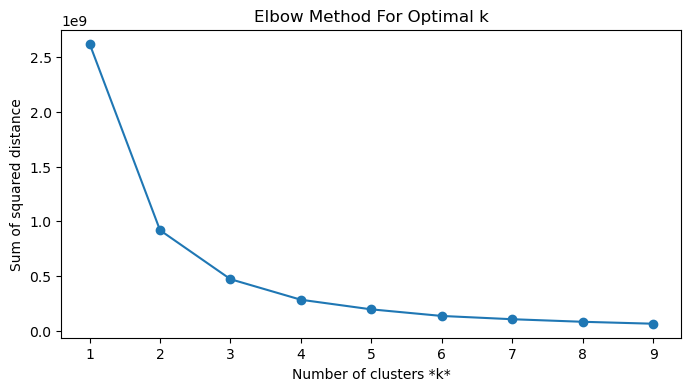

Cluster
1    1814
2    1775
0     666
Name: count, dtype: int64
[[3.35473574e+03 2.85472973e+00 4.13213213e+00 1.78678679e+00
  3.87387387e-01 9.00900901e-03 3.27027027e+00]
 [1.31683076e+03 1.60515436e+00 2.80595369e+00 1.34812569e+00
  7.55237045e-02 2.20507166e-03 3.45920617e+00]
 [2.21539718e+03 2.28676056e+00 3.59774648e+00 1.52788732e+00
  1.76901408e-01 2.81690141e-03 3.48732394e+00]]


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'dataset/cleaned_data.csv'
data_fillmean = pd.read_csv(file_path)

# Assuming outlier removal and normalization are completed
# Let's consider these features: 'sqft_living', 'bathrooms', 'bedrooms', 'floors'
features_to_cluster = ['sqft_living', 'bathrooms', 'bedrooms', 'floors','view', 'waterfront','condition']

import warnings
warnings.filterwarnings('ignore')

sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_fillmean[features_to_cluster])
    sse.append(km.inertia_)

# Plot SSE for each k
plt.figure(figsize=(8, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming the elbow is observed at k=3 (adjust based on your plot)
kmeans = KMeans(n_clusters=3, random_state=42)
data_fillmean['Cluster'] = kmeans.fit_predict(data_fillmean[features_to_cluster])

# Now let's see the centroids and cluster assignments
print(data_fillmean['Cluster'].value_counts())
print(kmeans.cluster_centers_)


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Include cluster labels as a feature
features = ['sqft_living', 'bathrooms', 'bedrooms', 'floors','view', 'waterfront', 'Cluster']
X = data_fillmean[features]
y = data_fillmean['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

import numpy as np


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# Optionally, compare it to average or median house prices for context
average_price = data_fillmean['price'].mean()
median_price = data_fillmean['price'].median()
print(f'Average Price: {average_price}')
print(f'Median Price: {median_price}')


Mean Squared Error: 25088619044.55225
Root Mean Squared Error: 158393.87312819978
Average Price: 479295.05384491774
Median Price: 446000.0


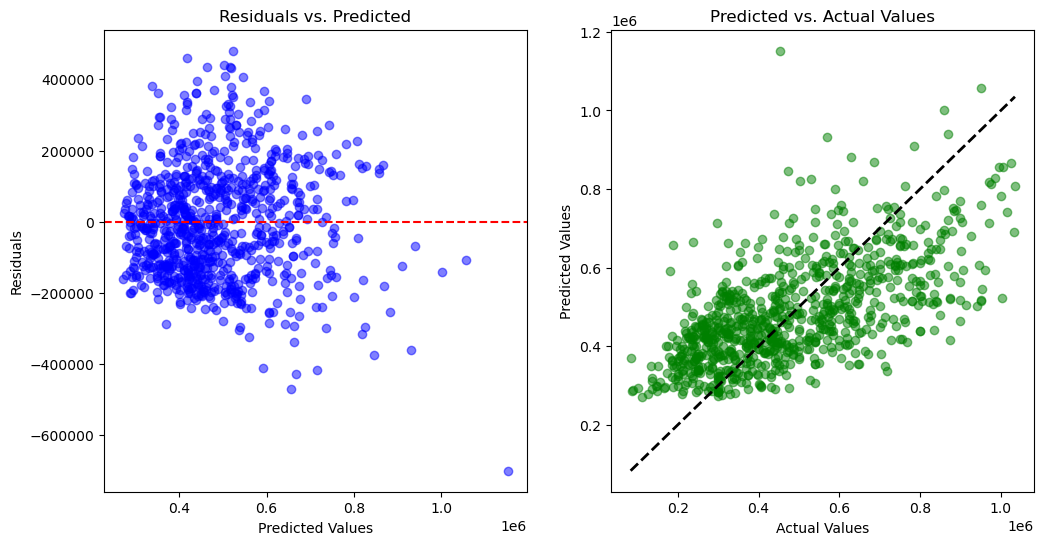

In [8]:
# Predict values
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')

# Subplot 2: Predicted vs Actual Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

plt.show()

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('dataset/cleaned_data.csv')

# Define weights
weights = {
    'sqft_living': 3,  # higher weight because the living space is a strong price determinant
    'bedrooms': 2,
    'bathrooms': 2,
    'floors': 1,
    'waterfront': 1.5,  # waterfront properties are typically valued higher
    'view': 1.5,
    'condition': 1,
    'sqft_basement': 1,
    'yr_renovated': 1,
    'house_age': 1
}

# Apply weights to the features
for feature, weight in weights.items():
    data[feature] *= weight

# Feature selection and scaling
features = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_renovated', 'house_age']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # adjust the number of clusters as needed
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Aggregate data within each cluster
cluster_aggregation = data.groupby('Cluster').agg({
    'price': ['mean', 'median', 'std'],
    'sqft_living': 'mean',
    'bedrooms': 'mean',
    'bathrooms': 'mean',
    'house_age': 'mean'
}).reset_index()

print(cluster_aggregation)


  Cluster          price                           sqft_living  bedrooms  \
                    mean    median            std         mean      mean   
0       0  649041.547009  650000.0  212141.633076  8176.282051  7.435897   
1       1  532178.219912  505000.0  198874.632238  7109.211848  7.014810   
2       2  368543.300766  342000.0  159703.937832  4045.024390  5.558339   
3       3  524818.663808  506500.0  193205.118106  6910.432692  7.803419   
4       4  716100.000000  663000.0  219255.167719  7174.800000  5.733333   

  bathrooms  house_age  
       mean       mean  
0  5.064103  56.068376  
1  5.148422  25.381198  
2  2.809492  70.920237  
3  4.521368  65.108974  
4  4.633333  70.533333  


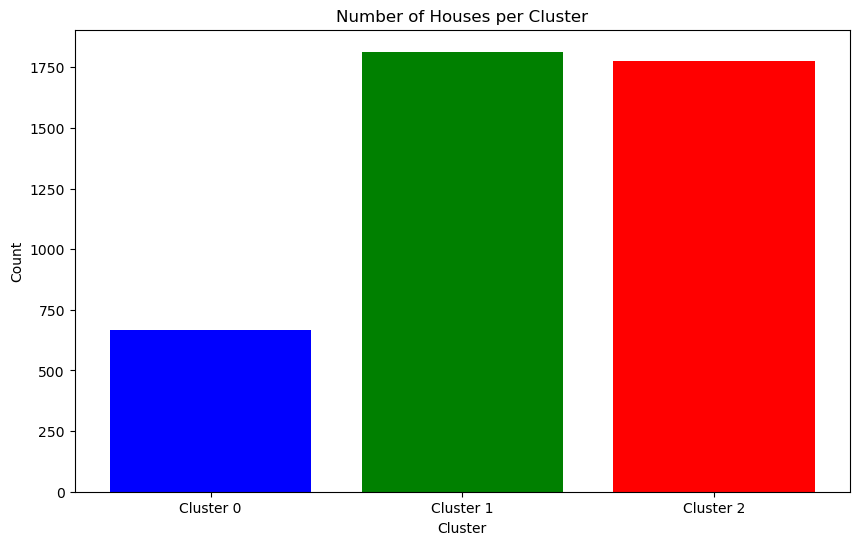

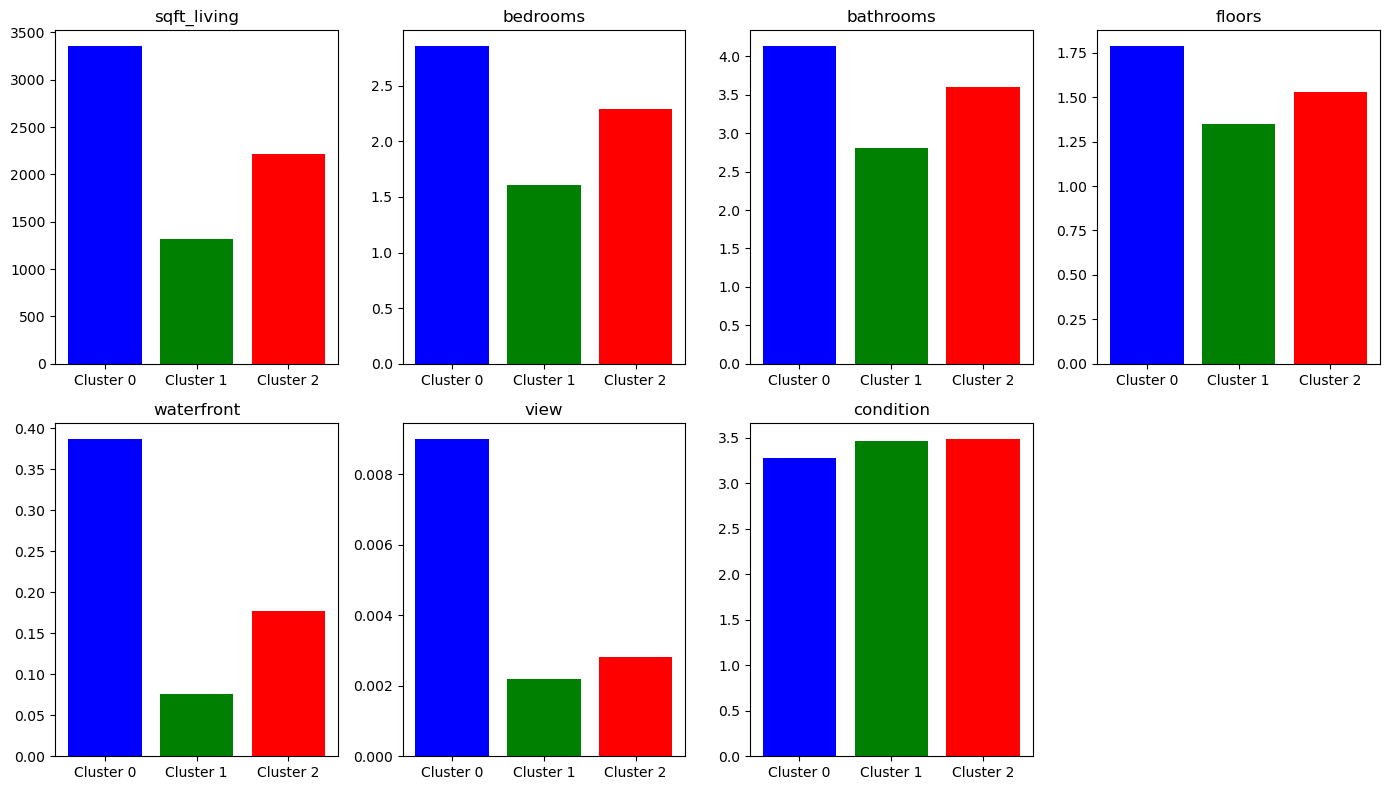

In [10]:

# Number of entries per cluster
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
counts = [666, 1814, 1775]

plt.figure(figsize=(10, 6))
plt.bar(clusters, counts, color=['blue', 'green', 'red'])
plt.title('Number of Houses per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Cluster centroids for key features
features = np.array([
    [3.35473574e+03, 2.85472973, 4.13213213, 1.78678679, 0.387387387, 0.009009009, 3.27027027],
    [1.31683076e+03, 1.60515436, 2.80595369, 1.34812569, 0.0755237045, 0.00220507166, 3.45920617],
    [2.21539718e+03, 2.28676056, 3.59774648, 1.52788732, 0.176901408, 0.00281690141, 3.48732394]
])
feature_labels = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

plt.figure(figsize=(14, 8))
for i in range(features.shape[1]):
    plt.subplot(2, 4, i + 1)
    plt.bar(clusters, features[:, i], color=['blue', 'green', 'red'])
    plt.title(feature_labels[i])
plt.tight_layout()
plt.show()

Number of Houses per Cluster

- Cluster 0 (666 houses): This cluster has the smallest number of houses among the three clusters.
- Cluster 1 (1814 houses): The largest cluster, indicating a high prevalence of houses with characteristics defined by this cluster's centroid.
- Cluster 2 (1775 houses): Very close in size to Cluster 1, suggesting a significant number of properties share these common features.

Feature Distribution by Cluster

- **Square Footage of Living Space (sqft_living):** 
  - Cluster 0 houses have significantly larger living spaces on average, suggesting these are more spacious or luxury homes. 
  - Cluster 2 houses have moderate living space, while Cluster 1 has the smallest average living space, possibly indicating more affordable or compact housing.
  
- **Bedrooms:** 
  - Cluster 0 again leads with more bedrooms on average, supporting the idea of larger or family-sized homes. 
  - Cluster 2 homes have fewer bedrooms than Cluster 0 but more than Cluster 1, which has the least, aligning with smaller household sizes or potentially single or double occupancy homes.
  
- **Bathrooms:** 
  - Consistent with the trends in sqft_living and bedrooms, Cluster 0 homes have more bathrooms, beneficial for larger families or luxury properties. 
  - Cluster 2 and 1 follow respectively in decreasing order.
  
- **Floors:** 
  - Cluster 0 homes tend to have more floors, which is typical for larger, more expansive homes. 
  - Clusters 1 and 2 have fewer floors on average, suggesting single or double-story buildings common in suburban settings.
  
- **Waterfront:** 
  - A small percentage of homes in Cluster 0 are on the waterfront, which adds a premium aspect to these properties. 
  - Clusters 1 and 2 have an even smaller proportion of waterfront properties, indicating these are more inland or urban settings.
  
- **View:** 
  - Very few houses in all clusters have a significant view, with Cluster 0 slightly leading, which might be due to its higher prevalence of waterfront homes.
  
- **Condition:** 
  - All clusters have homes in about similar conditions, with a slight variation, but all nearing a middle-range condition score of 3 out of 5. This suggests that despite differences in size, location, and amenities, the overall maintenance status across clusters does not vary dramatically.


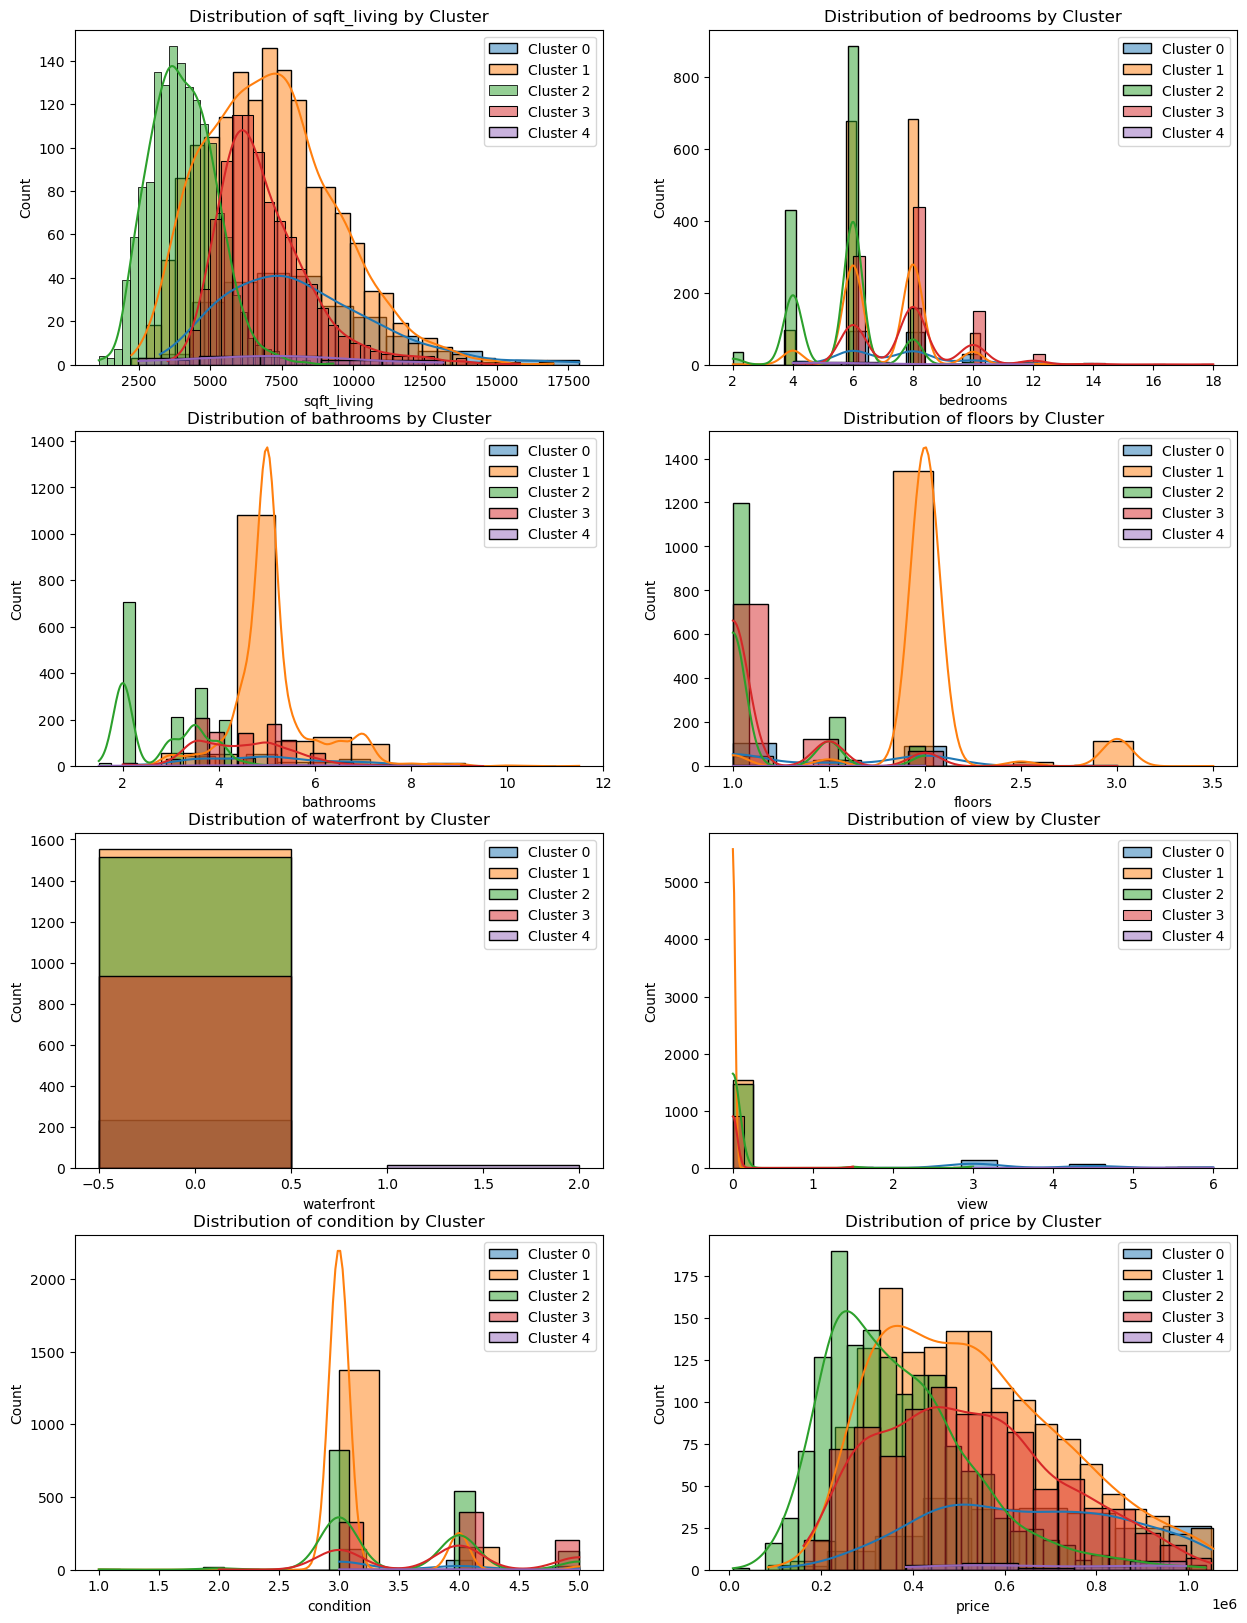

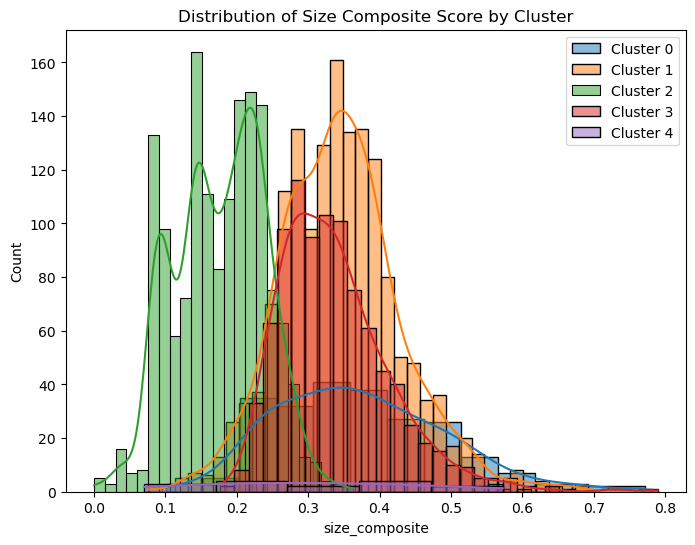

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

# Features for visualization
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'price']

# Normalizing features for better composite score calculation
data_normalized = data.copy()
for feature in features:
    data_normalized[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())

# Creating a composite indicator for size
data_normalized['size_composite'] = data_normalized[['sqft_living', 'bedrooms', 'bathrooms']].mean(axis=1)

# Visualizing individual features
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, feature in enumerate(features):
    ax = axes.flatten()[i]
    for cluster in sorted(data['Cluster'].unique()):
        sns.histplot(data[data['Cluster'] == cluster][feature], kde=True, ax=ax, label=f'Cluster {cluster}')
    ax.set_title(f'Distribution of {feature} by Cluster')
    ax.legend()

# Visualizing the composite indicator
plt.figure(figsize=(8, 6))
for cluster in sorted(data['Cluster'].unique()):
    sns.histplot(data_normalized[data_normalized['Cluster'] == cluster]['size_composite'], kde=True, label=f'Cluster {cluster}')
plt.title('Distribution of Size Composite Score by Cluster')
plt.legend()
plt.show()